In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from tqdm import tqdm
from HomomorphicFilter import HomomorphicFilter

In [2]:
import helper as h

In [3]:
DATA_DIR = './Data/RGB/'
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

In [4]:
df_csv = pd.read_csv('./Data/train.csv')

In [5]:
test_fnames = [fname for fname in os.listdir(DATA_DIR + TEST_DIR)
               if fname.lower().endswith('.jpg')]

## Generate

In [ ]:
DOUT_DIR = './Data/RGB-CLAHE/'
os.makedirs(DOUT_DIR + TRAIN_DIR, exist_ok=True)
os.makedirs(DOUT_DIR + TEST_DIR, exist_ok=True)

clahe = cv2.createCLAHE(clipLimit=2)

def transform(img):
    img = h.clahe(img, clahe_inst=clahe)
    return img

for fname in tqdm(df_csv['filename']):
    img = plt.imread(DATA_DIR + TRAIN_DIR + fname)
    plt.imsave(DOUT_DIR + TRAIN_DIR + fname, transform(img)
    
for fname in tqdm(test_fnames):
    img = plt.imread(DATA_DIR + TEST_DIR + fname)
    plt.imsave(DOUT_DIR + TEST_DIR + fname, transform(img))

In [ ]:
DOUT_DIR = './Data/RGB-CLAHE-HOMO/'
os.makedirs(DOUT_DIR + TRAIN_DIR, exist_ok=True)
os.makedirs(DOUT_DIR + TEST_DIR, exist_ok=True)

clahe = cv2.createCLAHE(clipLimit=2)
hm_filt = HomomorphicFilter(a=0.99, b=1.5, f_cut=20)

def transform(img):
    img = h.clahe(img, clahe_inst=clahe)
    img = h.homomorphic(img, filt_inst=hm_filt)
    return img

for fname in tqdm(df_csv['filename']):
    img = plt.imread(DATA_DIR + TRAIN_DIR + fname)
    plt.imsave(DOUT_DIR + TRAIN_DIR + fname, transform(img))
    
for fname in tqdm(test_fnames):
    img = plt.imread(DATA_DIR + TEST_DIR + fname)
    plt.imsave(DOUT_DIR + TEST_DIR + fname, transform(img))

In [ ]:
DOUT_DIR = './Data/HSI/'
os.makedirs(DOUT_DIR + TRAIN_DIR, exist_ok=True)
os.makedirs(DOUT_DIR + TEST_DIR, exist_ok=True)

def transform(img):
    img = h.rgb2hsi(img)
    return img

for fname in tqdm(df_csv['filename']):
    img = plt.imread(DATA_DIR + TRAIN_DIR + fname)
    plt.imsave(DOUT_DIR + TRAIN_DIR + fname, transform(img)

for fname in tqdm(test_fnames):
    img = plt.imread(DATA_DIR + TEST_DIR + fname)
    plt.imsave(DOUT_DIR + TEST_DIR + fname, transform(img))

In [ ]:
DOUT_DIR = './Data/HSI-CLAHE/'
os.makedirs(DOUT_DIR + TRAIN_DIR, exist_ok=True)
os.makedirs(DOUT_DIR + TEST_DIR, exist_ok=True)

clahe = cv2.createCLAHE(clipLimit=1)

def transform(img):
    img = h.rgb2hsi(img)
    img = h.clahe(img, clahe_inst=clahe)
    return img

for fname in tqdm(df_csv['filename']):
    img = plt.imread(DATA_DIR + TRAIN_DIR + fname)
    plt.imsave(DOUT_DIR + TRAIN_DIR + fname, transform(img))

for fname in tqdm(test_fnames):
    img = plt.imread(DATA_DIR + TEST_DIR + fname)
    plt.imsave(DOUT_DIR + TEST_DIR + fname, transform(img))

In [ ]:
DOUT_DIR = './Data/SGB-CLAHE/'
os.makedirs(DOUT_DIR + TRAIN_DIR, exist_ok=True)
os.makedirs(DOUT_DIR + TEST_DIR, exist_ok=True)

rgb_clahe = cv2.createCLAHE(clipLimit=2)
hsi_clahe = cv2.createCLAHE(clipLimit=1)

def rgb2sgb_clahe(rgb):
    rgb_clh = h.clahe(rgb, clahe_inst=rgb_clahe)
    hsi = h.rgb2hsi(rgb)
    hsi_clh = h.clahe(hsi, clahe_inst=hsi_clahe)
    img = np.stack([hsi_clh[:,:,1], rgb_clh[:,:,1], rgb_clh[:,:,2]]
                   , axis=-1)
    return img

for fname in tqdm(df_csv['filename']):
    rgb = plt.imread(DATA_DIR + TRAIN_DIR + fname)
    plt.imsave(DOUT_DIR + TRAIN_DIR + fname, rgb2sgb_clahe(rgb))

for fname in tqdm(test_fnames):
    rgb = plt.imread(DATA_DIR + TEST_DIR + fname)
    plt.imsave(DOUT_DIR + TEST_DIR + fname, rgb2sgb_clahe(rgb))

In [ ]:
DOUT_DIR = './Data/RGB-HOMO/'
os.makedirs(DOUT_DIR + TRAIN_DIR, exist_ok=True)
os.makedirs(DOUT_DIR + TEST_DIR, exist_ok=True)

hm_filt = HomomorphicFilter(a=0.99, b=1.5, f_cut=20)

def transform(rgb):
    rgb = h.homomorphic(rgb, filt_inst=hm_filt)
    return rgb

for fname in tqdm(df_csv['filename']):
    rgb = plt.imread(DATA_DIR + TRAIN_DIR + fname)
    plt.imsave(DOUT_DIR + TRAIN_DIR + fname, transform(rgb))

for fname in tqdm(test_fnames):
    rgb = plt.imread(DATA_DIR + TEST_DIR + fname)
    plt.imsave(DOUT_DIR + TEST_DIR + fname, transform(rgb))

In [ ]:
DOUT_DIR = './Data/SGB-HOMO/'
os.makedirs(DOUT_DIR + TRAIN_DIR, exist_ok=True)
os.makedirs(DOUT_DIR + TEST_DIR, exist_ok=True)

hm_filt = HomomorphicFilter(a=0.99, b=1.5, f_cut=20)

def rgb2sgb_homo(rgb):
    rgb_homo = h.homomorphic(rgb, filt_inst=hm_filt)
    hsi = h.rgb2hsi(rgb)
    hsi_homo = h.homomorphic(hsi, filt_inst=hm_filt)
    img = np.stack([hsi_homo[:,:,1], rgb_homo[:,:,1], rgb_homo[:,:,2]]
                   , axis=-1)
    return img

for fname in tqdm(df_csv['filename']):
    rgb = plt.imread(DATA_DIR + TRAIN_DIR + fname)
    plt.imsave(DOUT_DIR + TRAIN_DIR + fname, rgb2sgb_homo(rgb))

for fname in tqdm(test_fnames):
    rgb = plt.imread(DATA_DIR + TEST_DIR + fname)
    plt.imsave(DOUT_DIR + TEST_DIR + fname, rgb2sgb_homo(rgb))

## Check

In [6]:
# df = df_csv.sample(1)['filename']
# tf = test_fnames[:1]
df = ['6533706ac3cf.jpg']
tf = ['723ee9a06cb6.jpg']

### RGB

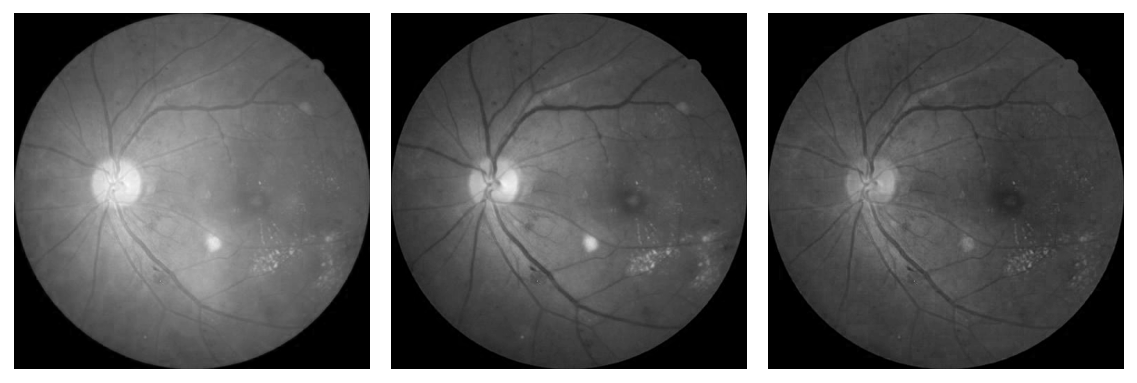

In [7]:
DIR = './Data/RGB/'
imgs = [plt.imread(DIR + TRAIN_DIR + fname) for fname in df]
h.show_imgs_chs(imgs)

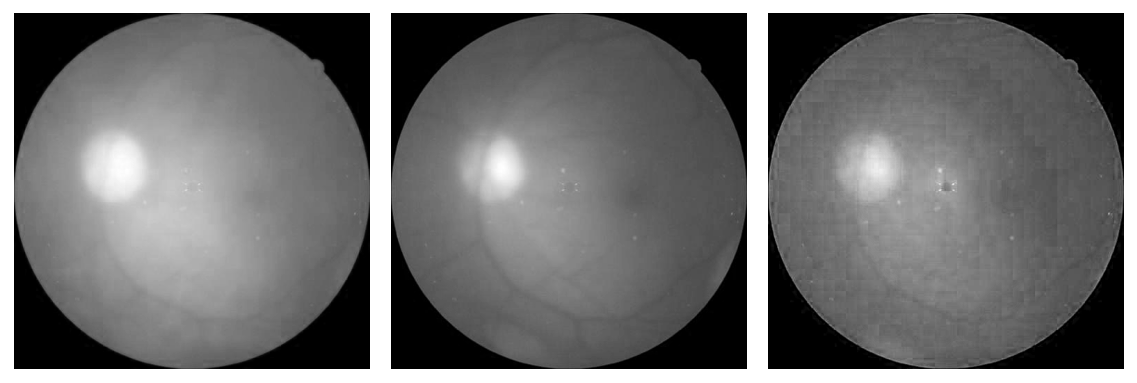

In [8]:
DIR = './Data/RGB/'
imgs = [plt.imread(DIR + TEST_DIR + fname) for fname in tf]
h.show_imgs_chs(imgs)

### RGB-CLAHE

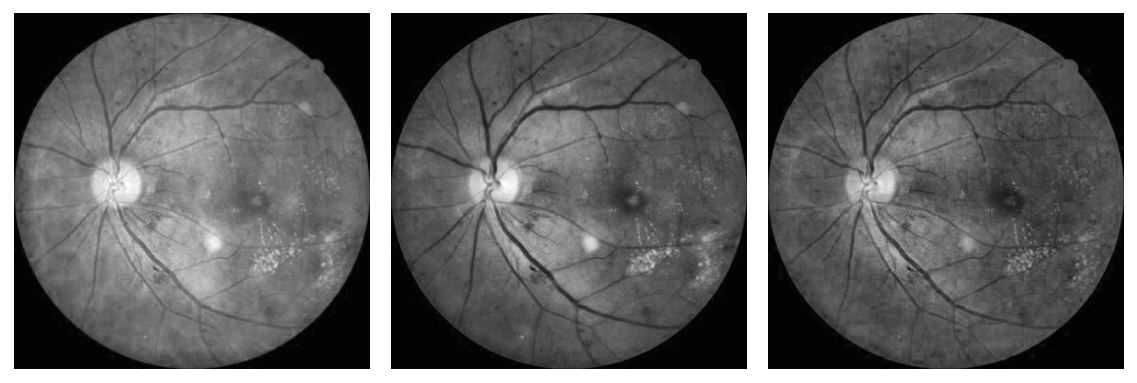

In [9]:
DIR = './Data/RGB-CLAHE/'
imgs = [plt.imread(DIR + TRAIN_DIR + fname) for fname in df]
h.show_imgs_chs(imgs)

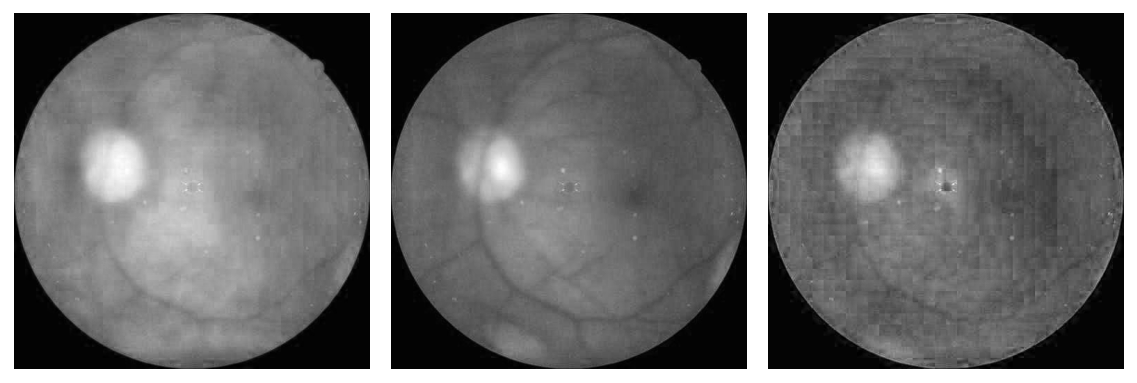

In [10]:
DIR = './Data/RGB-CLAHE/'
imgs = [plt.imread(DIR + TEST_DIR + fname) for fname in tf]
h.show_imgs_chs(imgs)

### RGB-CLAHE-HOMO

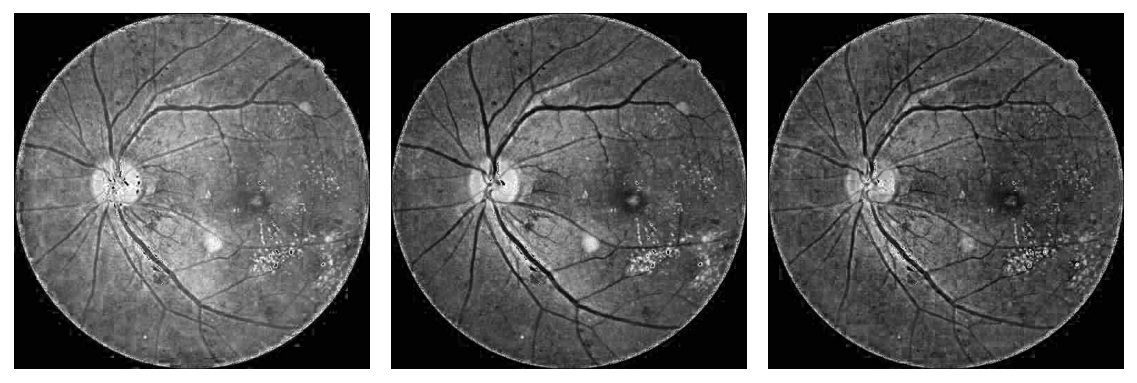

In [11]:
DIR = './Data/RGB-CLAHE-HOMO/'
imgs = [plt.imread(DIR + TRAIN_DIR + fname) for fname in df]
h.show_imgs_chs(imgs)

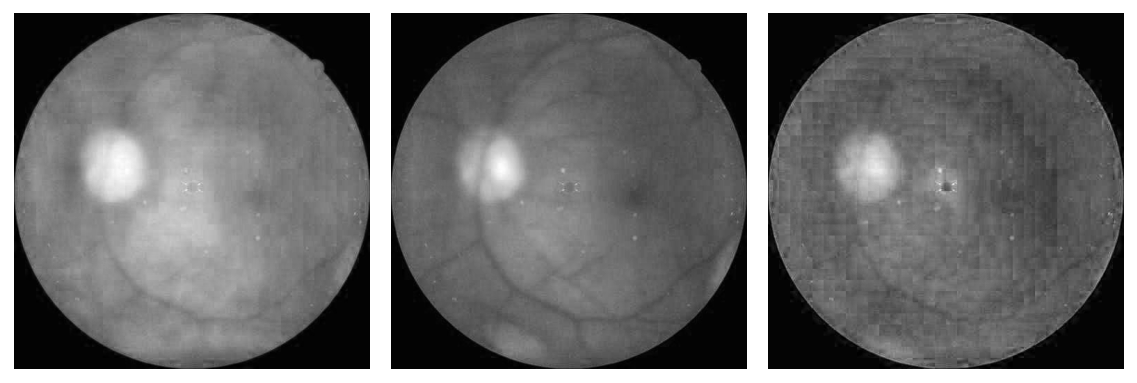

In [12]:
DIR = './Data/RGB-CLAHE/'
imgs = [plt.imread(DIR + TEST_DIR + fname) for fname in tf]
h.show_imgs_chs(imgs)

### HSI

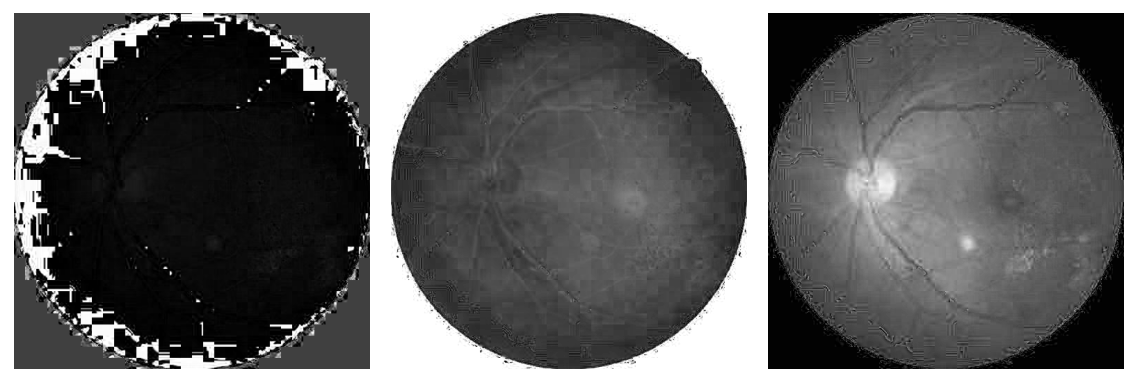

In [13]:
DIR = './Data/HSI/'
imgs = [plt.imread(DIR + TRAIN_DIR + fname) for fname in df]
h.show_imgs_chs(imgs)

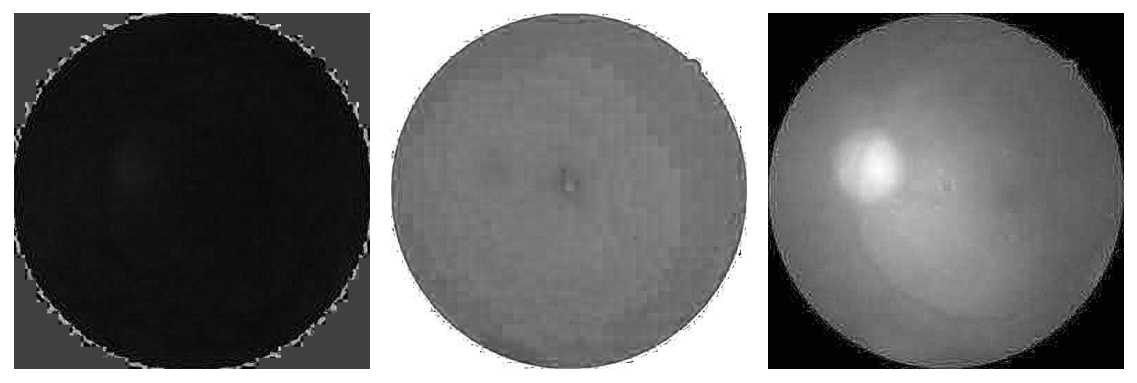

In [14]:
DIR = './Data/HSI/'
imgs = [plt.imread(DIR + TEST_DIR + fname) for fname in tf]
h.show_imgs_chs(imgs)

### HSI-CLAHE

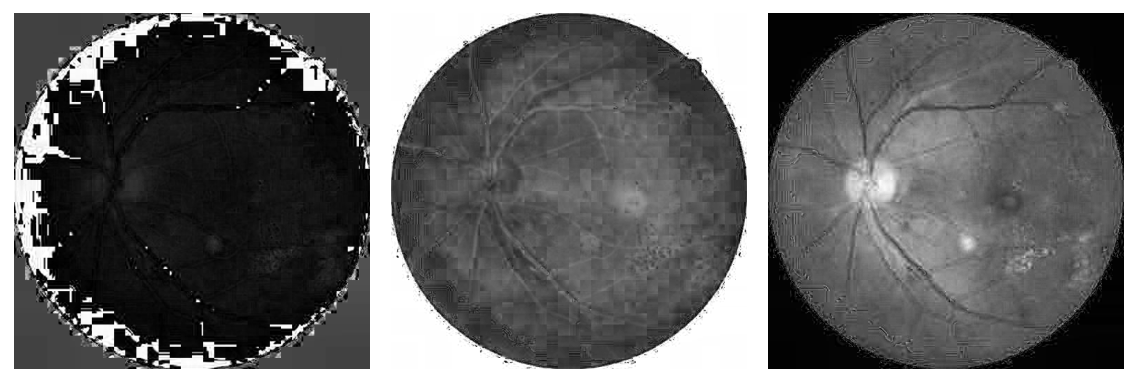

In [15]:
DIR = './Data/HSI-CLAHE/'
imgs = [plt.imread(DIR + TRAIN_DIR + fname) for fname in df]
h.show_imgs_chs(imgs)

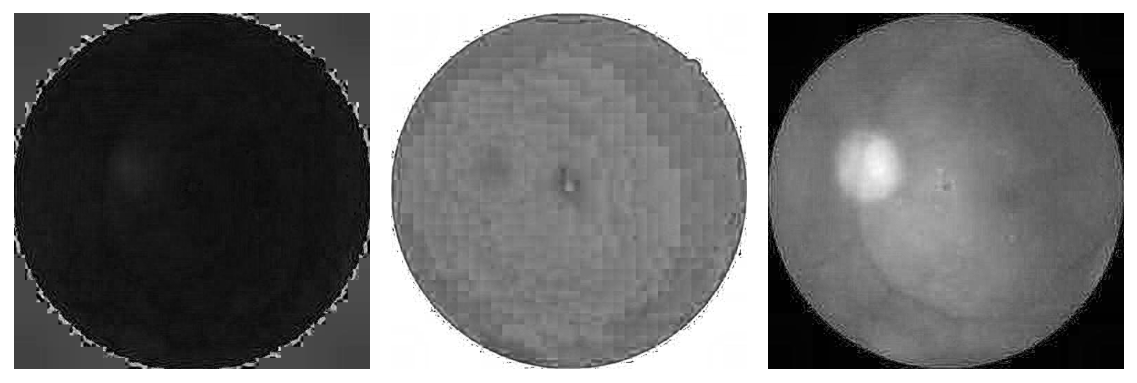

In [16]:
DIR = './Data/HSI-CLAHE/'
imgs = [plt.imread(DIR + TEST_DIR + fname) for fname in tf]
h.show_imgs_chs(imgs)

### SGB-CLAHE

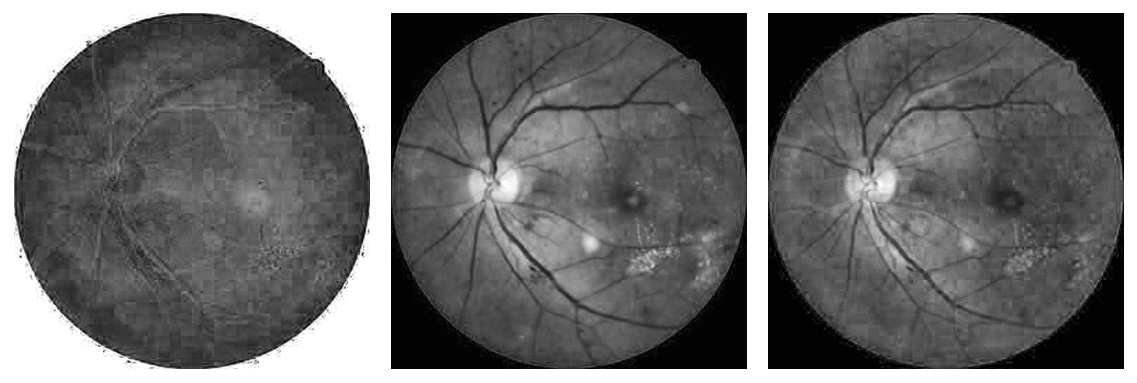

In [17]:
DIR = './Data/SGB-CLAHE/'
imgs = [plt.imread(DIR + TRAIN_DIR + fname) for fname in df]
h.show_imgs_chs(imgs)

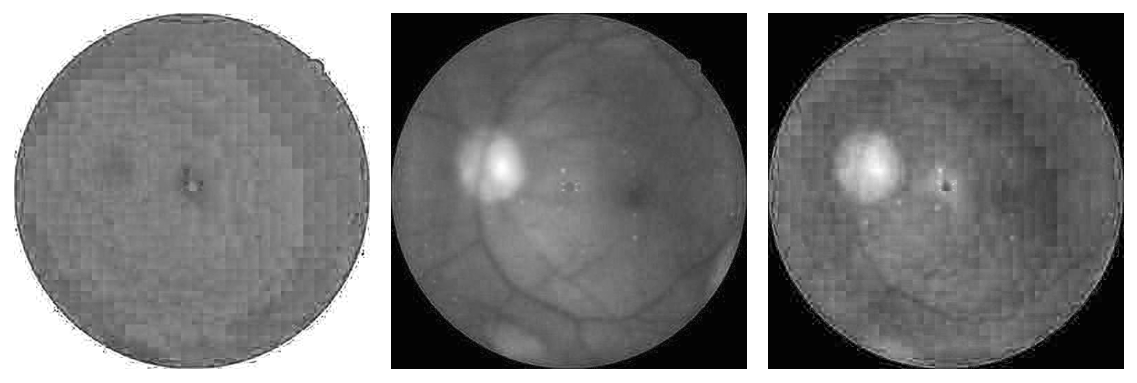

In [18]:
DIR = './Data/SGB-CLAHE/'
imgs = [plt.imread(DIR + TEST_DIR + fname) for fname in tf]
h.show_imgs_chs(imgs)

### RGB-HOMO

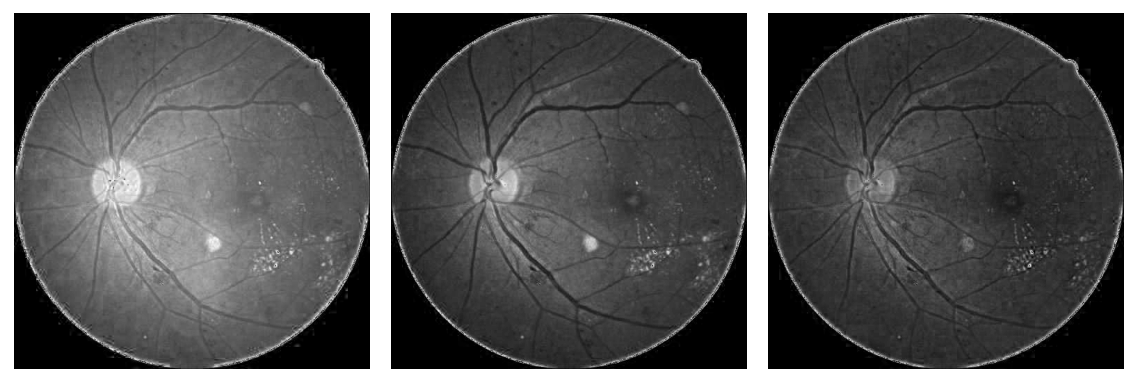

In [19]:
DIR = './Data/RGB-HOMO/'
imgs = [plt.imread(DIR + TRAIN_DIR + fname) for fname in df]
h.show_imgs_chs(imgs)

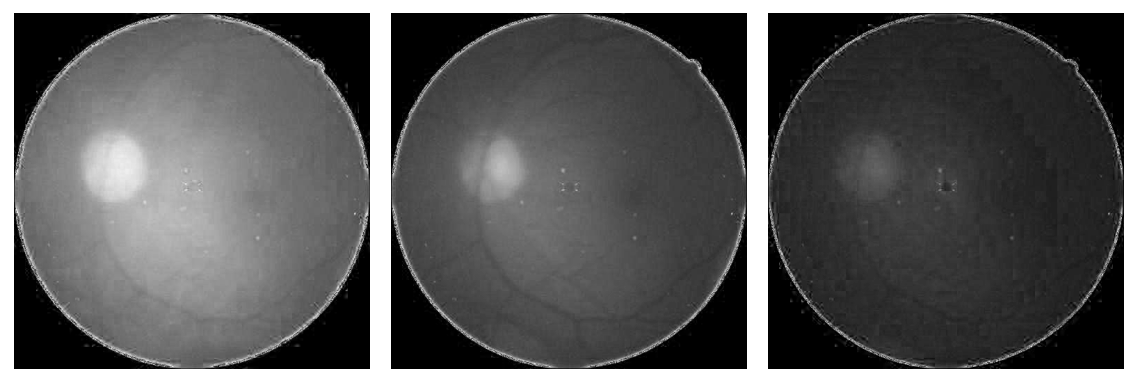

In [20]:
DIR = './Data/RGB-HOMO/'
imgs = [plt.imread(DIR + TEST_DIR + fname) for fname in tf]
h.show_imgs_chs(imgs)

### SGB-HOMO

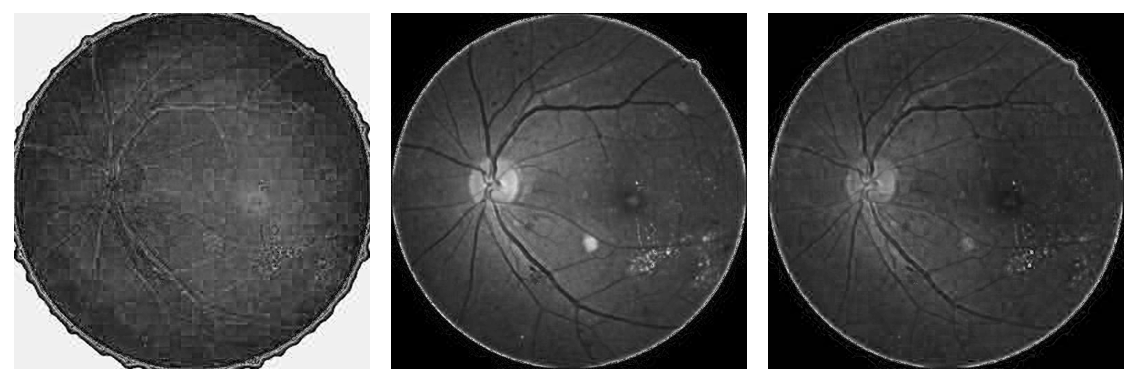

In [21]:
DIR = './Data/SGB-HOMO/'
imgs = [plt.imread(DIR + TRAIN_DIR + fname) for fname in df]
h.show_imgs_chs(imgs)

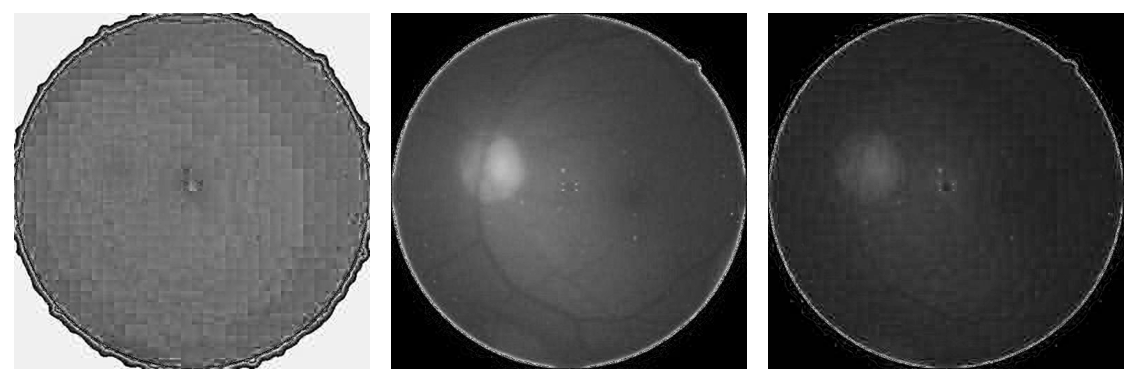

In [22]:
DIR = './Data/SGB-HOMO/'
imgs = [plt.imread(DIR + TEST_DIR + fname) for fname in tf]
h.show_imgs_chs(imgs)